# How strong are all generation one Pokemon attacks compared to all generation 8 Pokemon attacks?

I will be using observational study because I will be observing data. my study will also be retrospective because my data will be from the past. I will use census data because I'll be looking at whole generations and comparing them. the people who collected the Pokemon data are a community encyclopedia called bulbapedia that is run by bulbagarden and got it from official Pokemon sources. I exactly copied and pasted the data to make a scv file. Some biases that there might be are that some Pokemon might be missing, and that the source of my data might not know certain things about some Pokemon because there are so many Pokemon.

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [55]:
Gen1 = pd.read_csv("Gen1.csv")

In [56]:
Gen9 = pd.read_csv("Gen9.csv")

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Generation 1 Pokemon')

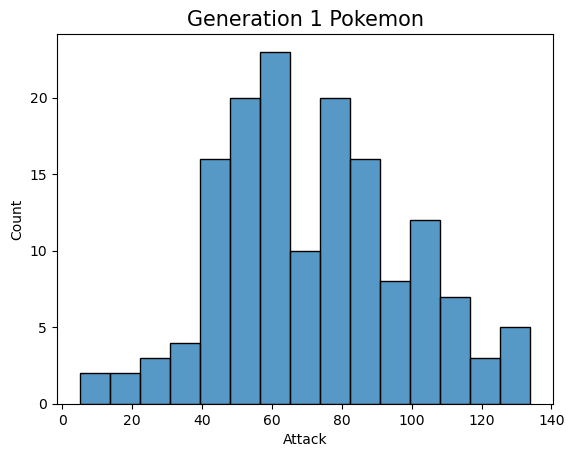

In [57]:
penguins = pd.read_csv("Gen1.csv")
sns.histplot(data=Gen1, x="Attack", bins=15)
plt.title("Generation 1 Pokemon", fontsize=15)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Generation 9 Pokemon')

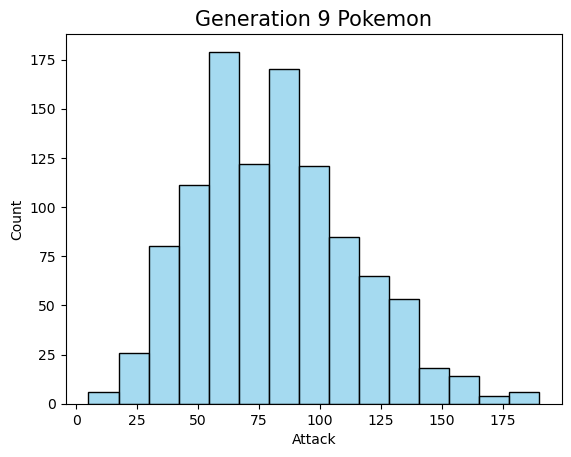

In [58]:
penguins = pd.read_csv("Gen9.csv")
sns.histplot(data=penguins, x="Attack", bins=15, color='skyblue')
plt.title("Generation 9 Pokemon", fontsize=15)

In [59]:
Gen1["Attack"].describe()

count    151.000000
mean      72.218543
std       26.313721
min        5.000000
25%       51.000000
50%       70.000000
75%       90.000000
max      134.000000
Name: Attack, dtype: float64

In [60]:
Gen9["Attack"].describe()

count    1060.000000
mean       80.972642
std        32.484153
min         5.000000
25%        56.000000
50%        80.000000
75%       100.000000
max       190.000000
Name: Attack, dtype: float64

In [71]:
mean = np.mean(Gen1["Attack"])
std = np.std(Gen1["Attack"], ddof=1) 
zscore = (Gen1["Attack"] - mean) / std
print("zscores:")
print(zscore)

outliers = abs(zscore) > 3
print("\nNumber of outliers:", outliers.sum())

zscores:
0     -0.882374
1     -0.388335
2      0.371725
3     -0.768365
4     -0.312329
         ...   
146   -0.312329
147    0.447731
148    2.347880
149    1.435808
150    1.055778
Name: Attack, Length: 151, dtype: float64

Number of outliers: 0


In [75]:
mean = np.mean(Gen9["Attack"])
std = np.std(Gen9["Attack"], ddof=1) 
zscore = (Gen9["Attack"] - mean) / std
print("zscores:")
print(zscore)

outliers = abs(zscore) > 3
print("\nNumber of outliers:", outliers.sum())

zscores:
0      -0.984253
1      -0.584058
2       0.031626
3       0.585743
4      -0.891901
          ...   
1055    0.339469
1056    1.509270
1057    1.047506
1058    1.047506
1059    1.047506
Name: Attack, Length: 1060, dtype: float64

Number of outliers: 6


Text(0.5, 1.0, 'Generation 1 Pokemon')

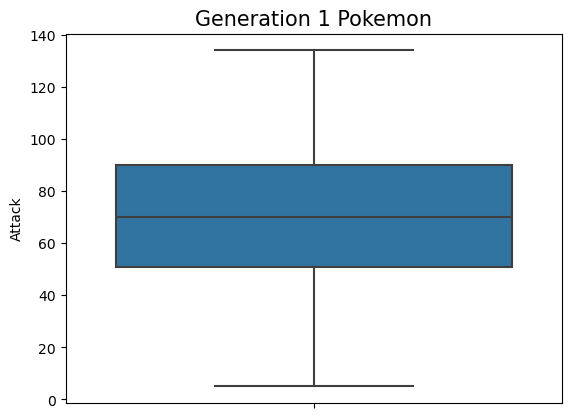

In [62]:
sns.boxplot(data=Gen1, y='Attack')
plt.title("Generation 1 Pokemon", fontsize=15)

Text(0.5, 1.0, 'Generation 9 Pokemon')

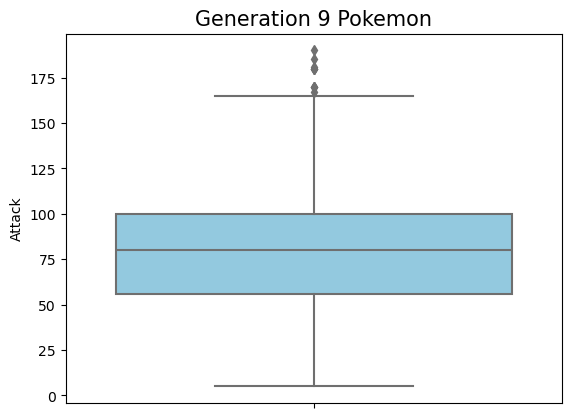

In [63]:
sns.boxplot(data=Gen9, y='Attack',color='skyblue')
plt.title("Generation 9 Pokemon", fontsize=15)

Text(0.5, 1.0, 'Both generations')

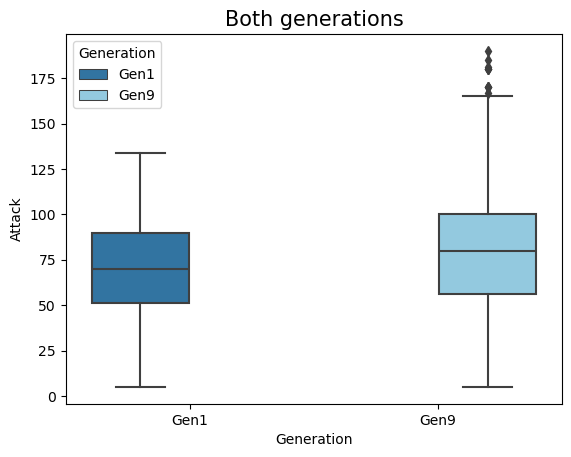

In [64]:
Gen1["Generation"] = "Gen1"
Gen9["Generation"] = "Gen9"
Gen1_Gen9_combined = pd.concat([Gen1, Gen9], ignore_index=True)
custom_palette = {"Gen1": "tab:blue", "Gen9": "skyblue"}
sns.boxplot(data=Gen1_Gen9_combined, x='Generation', y='Attack', hue="Generation",palette=custom_palette)
plt.title("Both generations", fontsize=15)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Density of Generation 9 pokemon attacks')

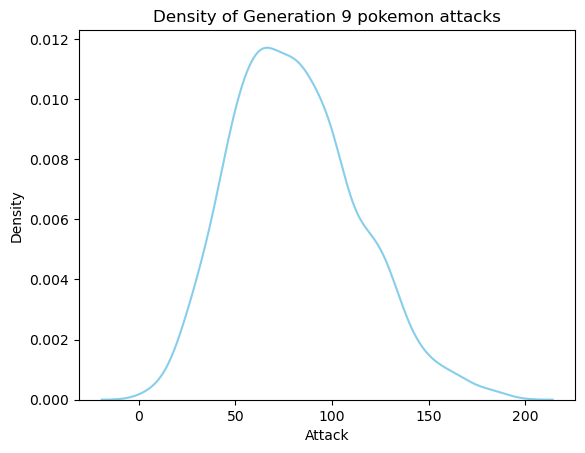

In [65]:
sns.kdeplot(data=Gen9, x="Attack", color="skyblue")
plt.title("Density of Generation 9 pokemon attacks")


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Density of Generation 1 pokemon attacks')

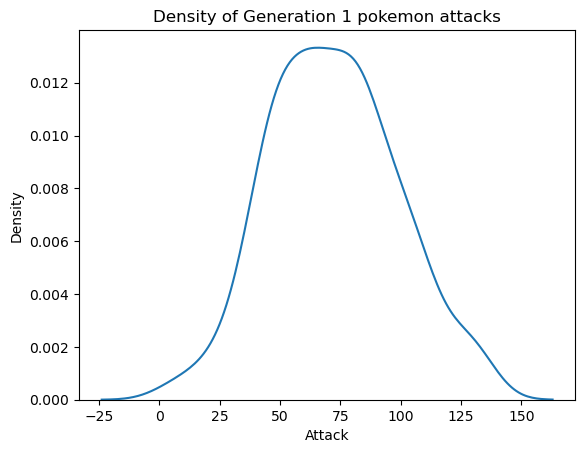

In [66]:
sns.kdeplot(data=Gen1, x="Attack", color="tab:blue")
plt.title("Density of Generation 1 pokemon attacks")

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Both generations')

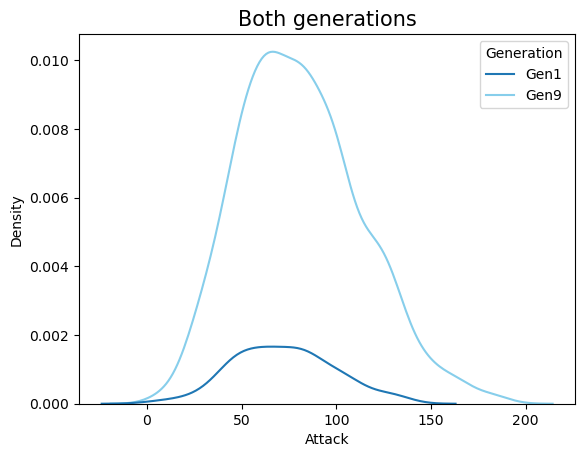

In [67]:
Gen1["Generation"] = "Gen1"
Gen9["Generation"] = "Gen9"
Gen1_Gen9_combined = pd.concat([Gen1, Gen9], ignore_index=True)
custom_palette = {"Gen1": "tab:blue", "Gen9": "skyblue"}
sns.kdeplot(data=Gen1_Gen9_combined, x='Attack', hue="Generation",palette=custom_palette)
plt.title("Both generations", fontsize=15)

Answer: All the Pokemon from Generation 1 have weaker attacks than all the Pokemon from Generation 9 because all Generation 9 Pokemon have a higher median and mean attacks of 80 while Generation 1 Pokemon have a mean and median attacks close to 70. there are a few outliers in Generation 9 meaning Generation 9 has a few really strong Pokemon that have a high attack.   